## PROBLEM STATEMENT

A challenge in the banking industry is to retain their customers. Every bank wants to hold their customers for sustaining their business so does our client - The ABC Multinational bank. Predicting the churn (of customer) in a  multi-national banking sector is a real-life problem that needs to be solved in a more accurate and automated way. There are several factors that results in churning of a customer. Banking sectors apply numerous techniques for analysing and predicting if a customer is going to churn or not.

## DATA DEFINITION

1.	**customer_id** - The unique identifier for a particular customer.
2.	**credit_score** - A measure of creditworthiness, how reliable a lender the customer is.
3.	**country** - Country of residence for the customer.
4.	**gender** - Gender of customer.
5.	**age** - Age of customer.
6.	**tenure** - Length of time the customer has held an account with the bank.
7.	**balance** - Amount of money present in the customer's account.
8.	**products_number** - The number of distinct products the customer holds with the bank (both a current account, savings, etc.)
9.	**credit_card** - Does the customer possess a credit card with the bank? (1/0)
10.	**active_member** - Is the customer actively using the bank's services?
11.	**estimated_salary** - Estimated total income of the customer.
12.	**churn** - Did the customer churn? (1/0) - **(Target Variable)**

#### Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### DATA PREPARATION:

In [18]:
df = pd.read_csv('bank_cus_churn.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,No,No,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0


In [19]:
df.shape

(10000, 12)

Summary of all variables in the dataset:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  object 
 9   active_member     10000 non-null  object 
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 937.6+ KB


Interpretation:
    
    The data set has 12 variables out of which 7 are numerical, and 5 are categorical. 

In [21]:
# Checking missing values 

df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [22]:
# checking duplicate values:

df.duplicated().sum()

0

In [23]:
# What countries are our customers from, and what's the exposure in that country?

df.groupby('country')['customer_id'].count()

country
France     5014
Germany    2509
Spain      2477
Name: customer_id, dtype: int64

In [24]:
# dropping customer_id

df.drop('customer_id',axis = 1, inplace = True)
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1
3,699,France,Female,39,1,0.00,2,No,No,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,Yes,No,96270.64,0
9996,516,France,Male,35,10,57369.61,1,Yes,Yes,101699.77,0
9997,709,France,Female,36,7,0.00,1,No,Yes,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,Yes,No,92888.52,1


#### Statistical summary of numeric variable:

In [25]:
df.describe()

,credit_score,age,tenure,balance,products_number,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000


In [26]:
df.mean()

credit_score           650.528800
age                     38.921800
tenure                   5.012800
balance              76485.889288
products_number          1.530200
estimated_salary    100090.239881
churn                    0.203700
dtype: float64

In [27]:
df.median()

credit_score           652.000
age                     37.000
tenure                   5.000
balance              97198.540
products_number          1.000
estimated_salary    100193.915
churn                    0.000
dtype: float64

#### Statistical summary of categorical variable:

In [28]:
df.describe (include = 'object').T

,count,unique,top,freq
country,10000,3,France,5014
gender,10000,2,Male,5457
credit_card,10000,2,Yes,7055
active_member,10000,2,Yes,5151


In [29]:
df.mode()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,850,France,Male,37,2,0.0,1,Yes,Yes,24924.92,0


##### Distribution of Variables in the data:

<function matplotlib.pyplot.show(close=None, block=None)>

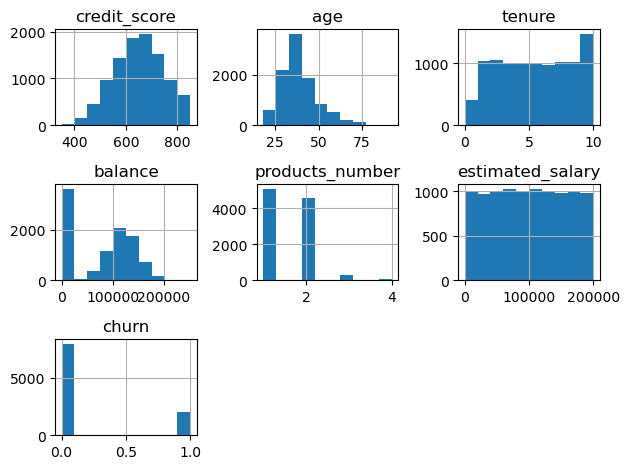

In [30]:
df.hist()
plt.tight_layout()
plt.show

Interpretation:
    
    We can see that, there is large exposure at low balance, high tenure and low estimated salary.

#### Outliers

In [31]:
#q1, q3 quantiles
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

#Inter Quantile Range
IQR = q3-q1

#upperlimit
ul = q3+(IQR*1.5)
#lower limit
ll = q1-(IQR*1.5)

In [32]:
#count of outliers

print(df[df>ul].count())
print(df[df<ll].count())

credit_score           0
country                0
gender                 0
age                  359
tenure                 0
balance                0
products_number       60
credit_card            0
active_member          0
estimated_salary       0
churn               2037
dtype: int64
credit_score        15
country              0
gender               0
age                  0
tenure               0
balance              0
products_number      0
credit_card          0
active_member        0
estimated_salary     0
churn                0
dtype: int64


   There are no major outliers in the data.

### Univariate Analysis:

#### Analysing Numerical Variables

In [33]:
df_num = df.select_dtypes(include = 'number')
df_num

,credit_score,age,tenure,balance,products_number,estimated_salary,churn
0,619,42,2,0.00,1,101348.88,1
1,608,41,1,83807.86,1,112542.58,0
2,502,42,8,159660.80,3,113931.57,1
3,699,39,1,0.00,2,93826.63,0
4,850,43,2,125510.82,1,79084.10,0
...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,0
9996,516,35,10,57369.61,1,101699.77,0
9997,709,36,7,0.00,1,42085.58,1
9998,772,42,3,75075.31,2,92888.52,1


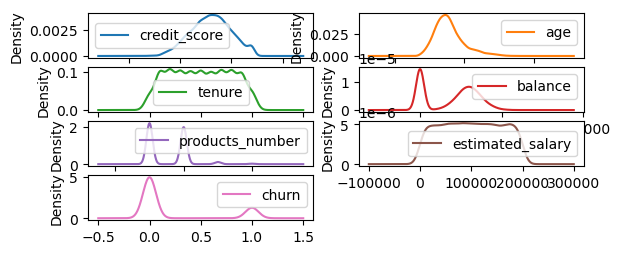

In [34]:
# Distribution of numerical data

df.plot(kind = 'density', subplots = True, layout = (7,2), sharex = False)

# displat the plot
plt.show()

In [35]:
df.skew()

credit_score       -0.071607
age                 1.011320
tenure              0.010991
balance            -0.141109
products_number     0.745568
estimated_salary    0.002085
churn               1.471611
dtype: float64

<AxesSubplot:>

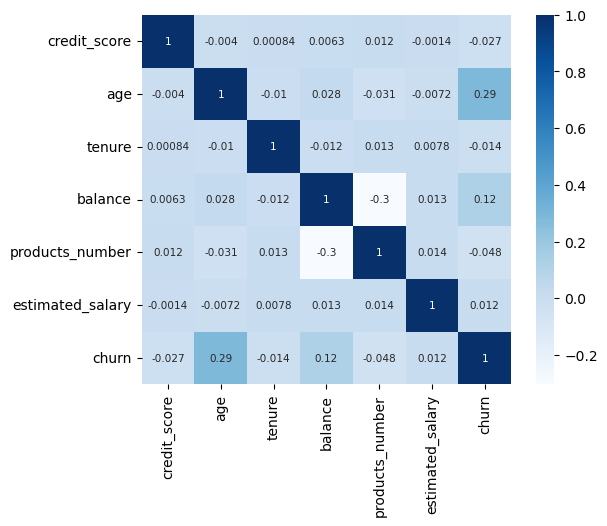

In [36]:
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 7.5}, cmap='Blues', square=True)

Interpretation:
    
    Through the correlation matrix, we can see that age has the highest correlation with churn, with 0.29. 
    The variable balance is also of interest, with a 0.12 correlation with churn. 
    So, older customers and those with higher balances are more likely to churn.

#### Analysing Categorical Variables:

In [37]:
df_cat = df.select_dtypes(include = 'object')
df_cat

,country,gender,credit_card,active_member
0,France,Female,Yes,Yes
1,Spain,Female,No,Yes
2,France,Female,Yes,No
3,France,Female,No,No
4,Spain,Female,Yes,Yes
...,...,...,...,...
9995,France,Male,Yes,No
9996,France,Male,Yes,Yes
9997,France,Female,No,Yes
9998,Germany,Male,Yes,No


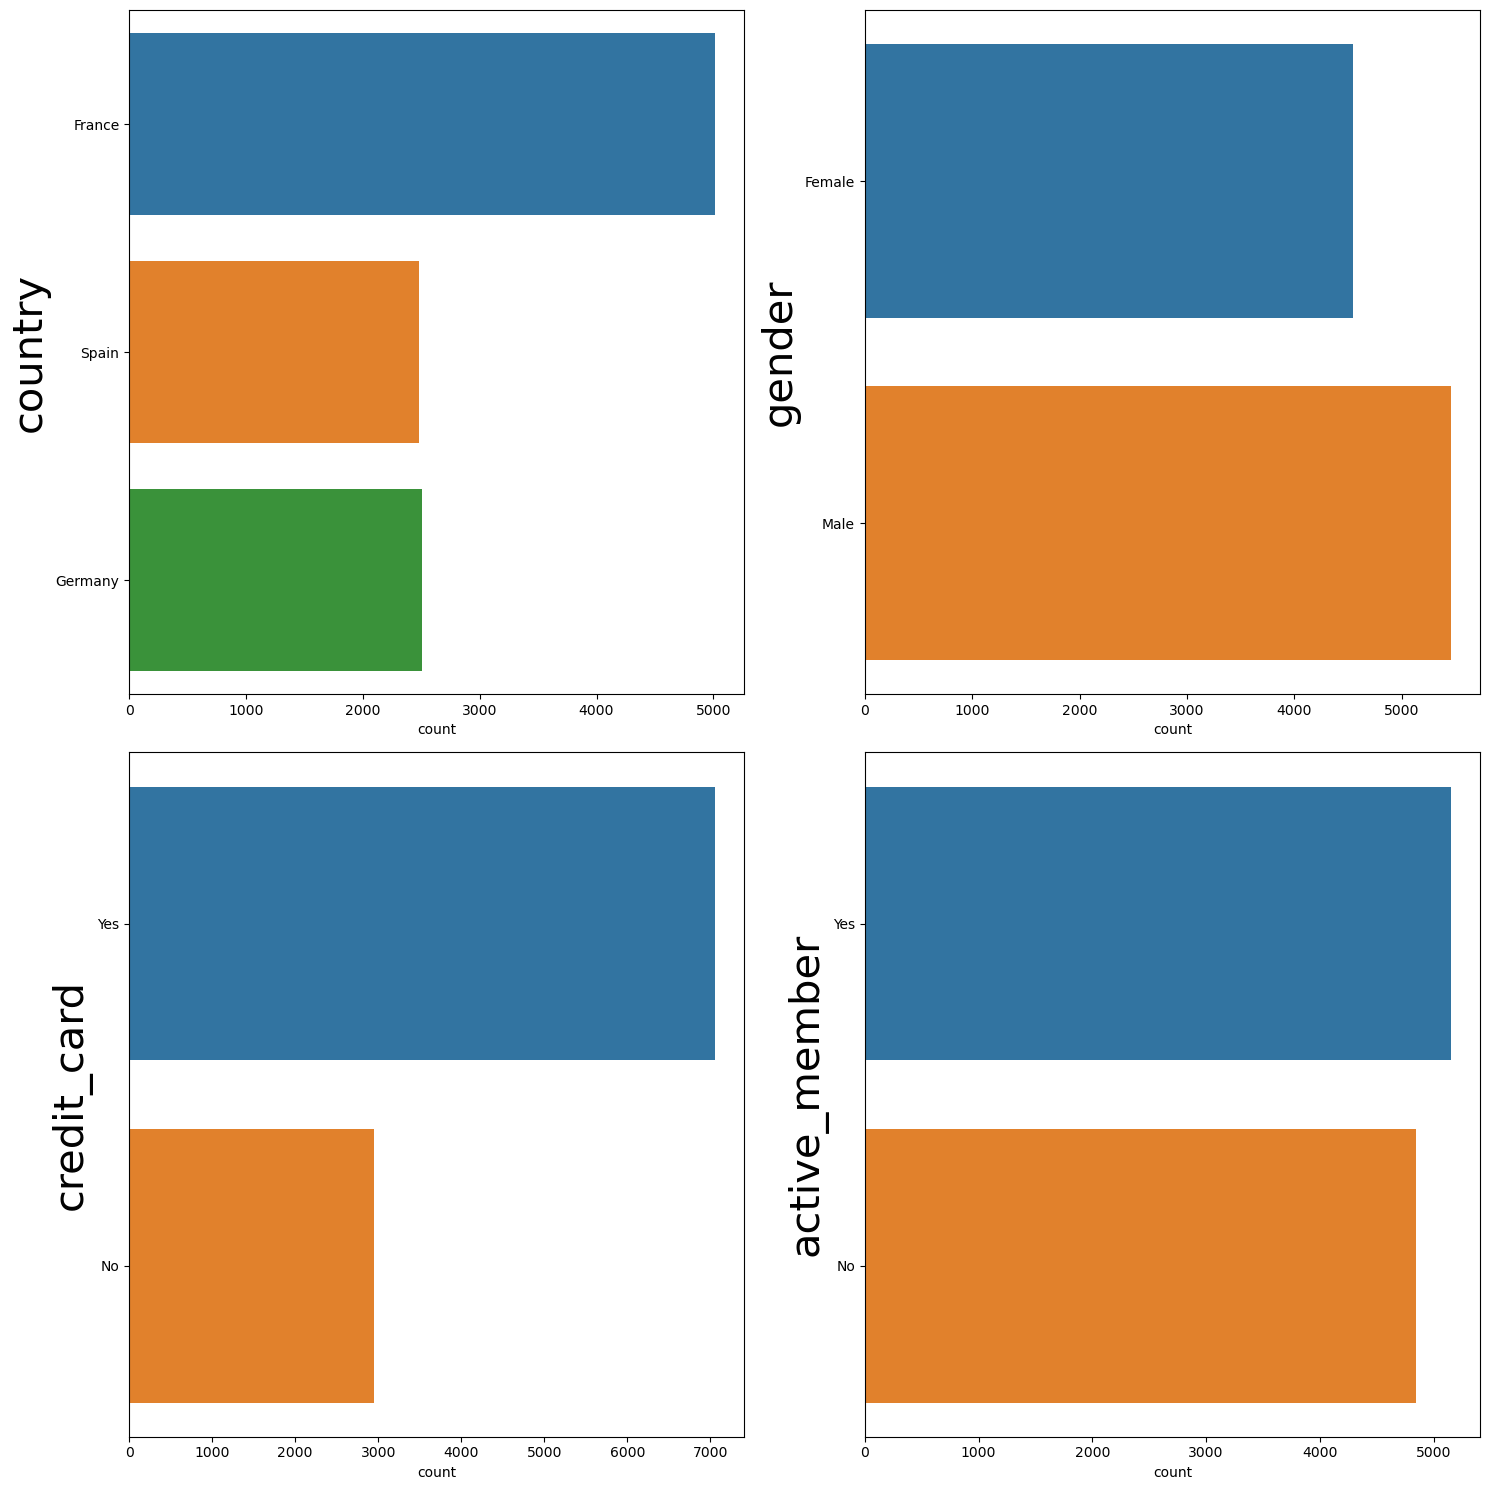

In [38]:
# ploting the count distribution for each categorical variable 

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

# plot a count plot for all the categorical variables

for variable, subplot in zip(df_cat, ax.flatten()):
   
    countplot = sns.countplot(y=df[variable], ax=subplot)
    countplot.set_ylabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show()

### Bivariate Analysis:

Between Categorical and Target Variable:

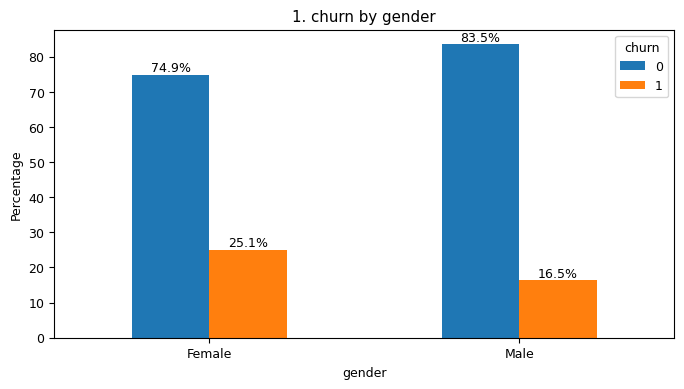

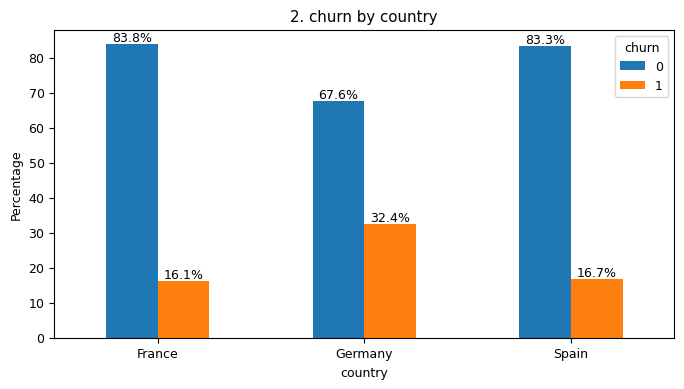

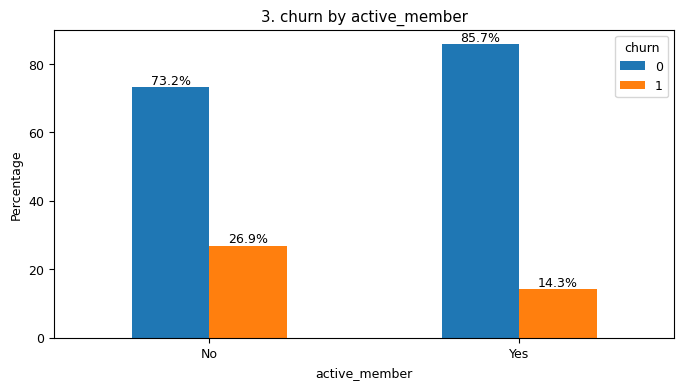

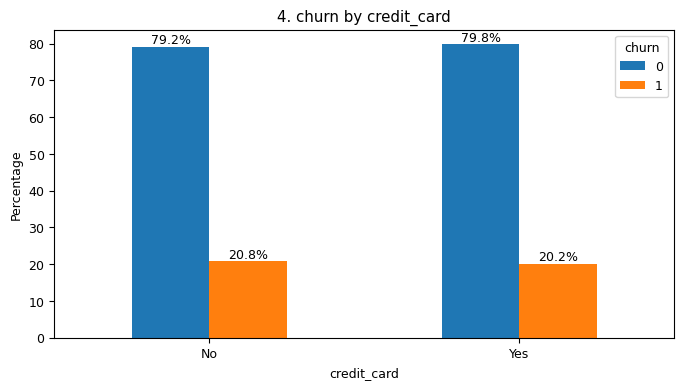

In [39]:
l=['gender','country','active_member','credit_card']

plt.rcParams.update({'font.size': 9})
for i in range(len(l)):
   
    gender_counts = df[l[i]].value_counts(normalize=True) * 100
    stroke_counts = round(df.groupby(l[i])['churn'].value_counts(normalize=True) * 100,2)
    crosstab_data = stroke_counts.unstack()

    # Create bar plot
    ax = crosstab_data.plot(kind='bar', figsize=(8,4))
    ax.set_title(f"{i+1}. churn by {l[i]}")
    ax.set_ylabel('Percentage')

    # Add data labels to the bars
    for j in ax.containers:
        ax.bar_label(j, labels=[f"{x:.1f}%" for x in j.datavalues], label_type='edge')
    plt.xticks(rotation=0)
    plt.show()

### Encoding:

In [40]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder (drop = 'first')
df_cat_ohe = ohe.fit_transform (df_cat).toarray()
df_cat_ohe

array([[0., 0., 0., 1., 1.],
       [0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [41]:
feat_name = ohe.get_feature_names_out ()
feat_name

array(['country_Germany', 'country_Spain', 'gender_Male',
       'credit_card_Yes', 'active_member_Yes'], dtype=object)

In [42]:
encoded_df = pd.DataFrame (df_cat_ohe, columns = feat_name)
encoded_df

,country_Germany,country_Spain,gender_Male,credit_card_Yes,active_member_Yes
0,0.0,0.0,0.0,1.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...
9995,0.0,0.0,1.0,1.0,0.0
9996,0.0,0.0,1.0,1.0,1.0
9997,0.0,0.0,0.0,0.0,1.0
9998,1.0,0.0,1.0,1.0,0.0


### Splitting the data into Train and Test

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
df_ = df_num[['credit_score','age','tenure','balance','products_number','estimated_salary']]
df_

,credit_score,age,tenure,balance,products_number,estimated_salary
0,619,42,2,0.00,1,101348.88
1,608,41,1,83807.86,1,112542.58
2,502,42,8,159660.80,3,113931.57
3,699,39,1,0.00,2,93826.63
4,850,43,2,125510.82,1,79084.10
...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64
9996,516,35,10,57369.61,1,101699.77
9997,709,36,7,0.00,1,42085.58
9998,772,42,3,75075.31,2,92888.52


In [45]:
X1 = pd.concat ([df_ , encoded_df], axis = 1)
X1

,credit_score,age,tenure,balance,products_number,estimated_salary,country_Germany,country_Spain,gender_Male,credit_card_Yes,active_member_Yes
0,619,42,2,0.00,1,101348.88,0.0,0.0,0.0,1.0,1.0
1,608,41,1,83807.86,1,112542.58,0.0,1.0,0.0,0.0,1.0
2,502,42,8,159660.80,3,113931.57,0.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,93826.63,0.0,0.0,0.0,0.0,0.0
4,850,43,2,125510.82,1,79084.10,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,0.0,0.0,1.0,1.0,0.0
9996,516,35,10,57369.61,1,101699.77,0.0,0.0,1.0,1.0,1.0
9997,709,36,7,0.00,1,42085.58,0.0,0.0,0.0,0.0,1.0
9998,772,42,3,75075.31,2,92888.52,1.0,0.0,1.0,1.0,0.0


In [46]:
y1 = df_num[['churn']]
y1

,churn
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [47]:
print(X1.shape)
print(y1.shape)

(10000, 11)
(10000, 1)


In [48]:
X_train,X_test,y_train,y_test = train_test_split(X1, y1, random_state = 20, test_size = 0.25)

In [49]:
print(X_train.shape,X_test.shape)

print(y_train.shape,y_test.shape)

(7500, 11) (2500, 11)
(7500, 1) (2500, 1)


### Using Statsmodel:

In [50]:
import statsmodels.api as sm

In [51]:
X2 = X_train
y2 = y_train
X2 = sm.add_constant(X2)
X2.shape,y2.shape
X2_test = X_test
X2_test = sm.add_constant(X2_test)

In [52]:
X2_test = X_test
X2_test = sm.add_constant(X2_test)

In [53]:
stats_model = sm.Logit(y2, X2)

results = stats_model.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.430510
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 7500
Model:                          Logit   Df Residuals:                     7488
Method:                           MLE   Df Model:                           11
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                  0.1577
Time:                        10:11:38   Log-Likelihood:                -3228.8
converged:                       True   LL-Null:                       -3833.4
Covariance Type:            nonrobust   LLR p-value:                1.774e-252
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.5236      0.281    -12.533      0.000      -4.075      -2.973
credit_score         -0.0006      0.000     -1.860      0.063      -0.001    3.19e-05
age                   0.0747      0.003     25.060      0.000       0.069       0.081
tenure               -0.0183      0.011     -1.700      0.089      -0.039       0.003
balance            2.849e-06   5.91e-07      4.822      0.000    1.69e-06    4.01e-06
products_number      -0.1038      0.054     -1.915      0.055      -0.210       0.002
estimated_salary   2.802e-07   5.46e-07      0.513      0.608   -7.91e-07    1.35e-06
country_Germany       0.7381      0.078      9.515      0.000       0.586       0.890
country_Spain        -0.0125      0.081     -0.154      0.878      -0.171       0.146
gender_Male          -0.4629      0.063     -7.392      0.000      -0.586      -0.340
credit_card_Yes       0.0041      0.069      0.059      0.953      -0.131       0.139
active_member_Yes    -1.0848      0.066    -16.341      0.000      -1.215      -0.955
=====================================================================================
"""

In [54]:
# Backward elimination to drop insignificant variables one by one

cols = list(X2.columns)
p = []

while len(cols)>1:
    X2 = X2[cols]
    model= sm.Logit(y2, X2).fit()
    
    p = model.pvalues
    pmax = max(p)
    pid = p.idxmax()
    if pmax>0.05:
        cols.remove(pid)
        print('Variable removed:', pid, pmax)
    else:
        break
cols   

Optimization terminated successfully.
         Current function value: 0.430510
         Iterations 6
Variable removed: credit_card_Yes 0.9526378685192197
Optimization terminated successfully.
         Current function value: 0.430510
         Iterations 6
Variable removed: country_Spain 0.8775305344124119
Optimization terminated successfully.
         Current function value: 0.430512
         Iterations 6
Variable removed: estimated_salary 0.6088449157443812
Optimization terminated successfully.
         Current function value: 0.430529
         Iterations 6
Variable removed: tenure 0.08997300066092617
Optimization terminated successfully.
         Current function value: 0.430721
         Iterations 6
Variable removed: credit_score 0.060864913095120945
Optimization terminated successfully.
         Current function value: 0.430955
         Iterations 6
Variable removed: products_number 0.051138365587738904
Optimization terminated successfully.
         Current function value: 0.43121

['const',
 'age',
 'balance',
 'country_Germany',
 'gender_Male',
 'active_member_Yes']

In [55]:
predicted_probs = results.predict(X2_test)

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, roc_curve

In [58]:
auroc = roc_auc_score(y_test, predicted_probs)
print("AUROC:", auroc)

AUROC: 0.7535033046530011


In [59]:
X3 = X2[['age','balance','country_Germany','gender_Male','active_member_Yes']]
X3 = sm.add_constant(X3)
X3_test = X2_test[['age','balance','country_Germany','gender_Male','active_member_Yes']]
X3_test = sm.add_constant(X3_test)

In [60]:
stats_model = sm.Logit(y2, X3)

results1 = stats_model.fit()

results1.summary()

Optimization terminated successfully.
         Current function value: 0.431211
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 7500
Model:                          Logit   Df Residuals:                     7494
Method:                           MLE   Df Model:                            5
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                  0.1563
Time:                        10:12:37   Log-Likelihood:                -3234.1
converged:                       True   LL-Null:                       -3833.4
Covariance Type:            nonrobust   LLR p-value:                5.954e-257
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.1580      0.138    -30.210      0.000      -4.428      -3.888
age                   0.0748      0.003     25.135      0.000       0.069       0.081
balance            3.149e-06   5.69e-07      5.538      0.000    2.03e-06    4.26e-06
country_Germany       0.7279      0.072     10.102      0.000       0.587       0.869
gender_Male          -0.4585      0.063     -7.334      0.000      -0.581      -0.336
active_member_Yes    -1.0879      0.066    -16.423      0.000      -1.218      -0.958
=====================================================================================
"""

In [61]:
predicted_probs1 = results1.predict(X3_test)

auroc1 = roc_auc_score(y_test, predicted_probs1)
print("AUROC:", auroc1)

AUROC: 0.7523238104697697


Report: 
    
    There isn't any significance difference between the first statsmodel and the second statsmodel (where we have dropped the insignificant features).
    Thus, we are considering the second model as in this model we have removed all the insignificant features.

### Using Sklearn:`

1. Logistic Regression Model:

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [64]:
y_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)
y_train_prob = logreg.predict_proba(X_train)[:,1]

In [65]:
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)

print("Accuracy Train:", accuracy_train)
print("Precision Test:", precision_train)
print("Recall Test:", recall_train)

Accuracy Train: 0.7853333333333333
Precision Test: 0.4072727272727273
Recall Test: 0.0718409236690186


In [66]:
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)

print("Accuracy Test:", accuracy_test)
print("Precision Test:", precision_test)
print("Recall Test:", recall_test)

Accuracy Test: 0.8024
Precision Test: 0.39473684210526316
Recall Test: 0.06276150627615062


AU-ROC Curve:

Train AU-ROC Curve:

AU-ROC Score: 0.522202232580175


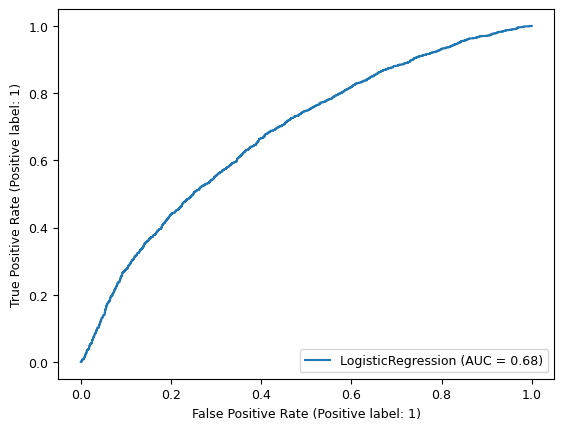

In [67]:
print('Train AU-ROC Curve:')

# Calculate AU-ROC score

fpr, tpr, thresholds = roc_curve(y_train, y_train_prob )
auc_roc = roc_auc_score(y_train, y_train_pred)
print("\nAU-ROC Score:", auc_roc)

# Plot AU-ROC curve

plot_roc_curve(logreg, X_train, y_train)
plt.show()

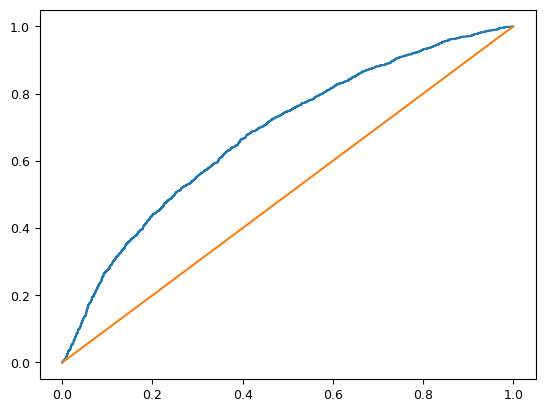

In [68]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.show()

Test AU-ROC Curve:

AU-ROC Score: 0.5200058767780357


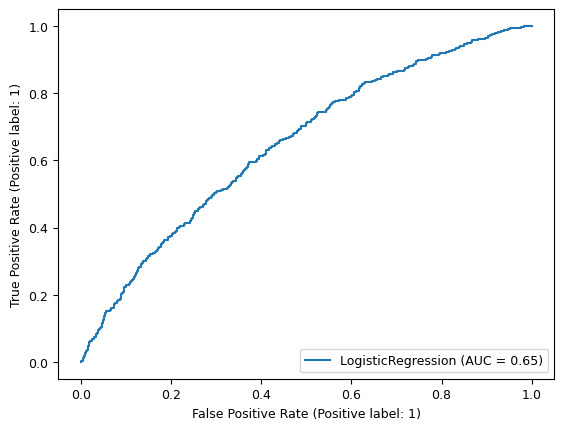

In [69]:
print('Test AU-ROC Curve:')

# Calculate AU-ROC score

auc_roc = roc_auc_score(y_test, y_pred)
print("\nAU-ROC Score:", auc_roc)

# Plot AU-ROC curve

plot_roc_curve(logreg, X_test, y_test)
plt.show()

### Feature Selection:

1. Sequential Feature Selection (SFS):

In [70]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

# Defining the range of k values
k_values = range(1, 12)

for k in k_values:
    logistic_regression = LogisticRegression()

    # Creating the Sequential Feature Selector object
    sfs = SequentialFeatureSelector(logistic_regression,
                                    k_features=k,
                                    forward=True,
                                    scoring='roc_auc',  # Use ROC AUC as the scoring metric
                                    cv=5)
    
    # Perform feature selection
    sfs.fit(X_train, y_train)

    # Geting the selected feature subset
    selected_features_sfs_lr = X_train.columns[list(sfs.k_feature_idx_)]

    print(f"Selected features for k={k}: {selected_features_sfs_lr}")


Selected features for k=1: Index(['age'], dtype='object')
Selected features for k=2: Index(['age', 'country_Germany'], dtype='object')
Selected features for k=3: Index(['age', 'country_Germany', 'active_member_Yes'], dtype='object')
Selected features for k=4: Index(['age', 'country_Germany', 'gender_Male', 'active_member_Yes'], dtype='object')
Selected features for k=5: Index(['age', 'tenure', 'country_Germany', 'gender_Male', 'active_member_Yes'], dtype='object')
Selected features for k=6: Index(['credit_score', 'age', 'tenure', 'country_Germany', 'gender_Male',
       'active_member_Yes'],
      dtype='object')
Selected features for k=7: Index(['credit_score', 'age', 'tenure', 'country_Germany', 'gender_Male',
       'credit_card_Yes', 'active_member_Yes'],
      dtype='object')
Selected features for k=8: Index(['credit_score', 'age', 'tenure', 'country_Germany', 'country_Spain',
       'gender_Male', 'credit_card_Yes', 'active_member_Yes'],
      dtype='object')
Selected features fo

In [71]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

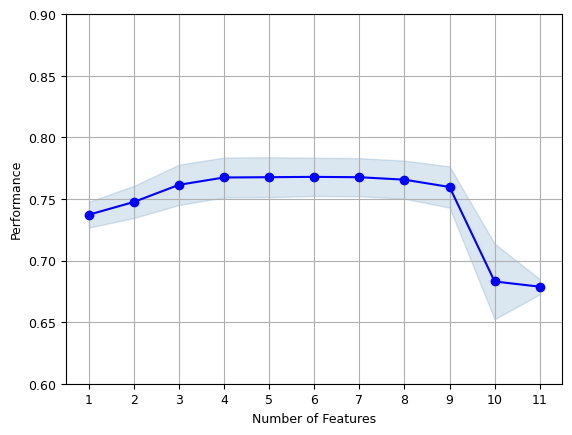

In [72]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

Interpretation:
    
    As we can see from the graph above that after 5 features the performance is stable even if we take 6,7 or 8 features. However, the performance drops drastically if we take 10 or all the features.

2. Decision Tree Model:

In [73]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=1888)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1888)

In [74]:
y_pred_dt = decision_tree.predict(X_test)
y_dt_train = decision_tree.predict(X_train)

In [75]:
accuracy_dt_t = accuracy_score(y_train, y_dt_train)
precision_dt_t = precision_score(y_train, y_dt_train)
recall_dt_t = recall_score(y_train, y_dt_train)

print('Train set metrics:')
print("Accuracy:", accuracy_dt_t)
print("Precision:", precision_dt_t)
print("Recall:", recall_dt_t)

Train set metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [76]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

print('Test set metrics:')
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)

Test set metrics:
Accuracy: 0.7932
Precision: 0.4632768361581921
Recall: 0.5146443514644351


Interpretation:
    
    Here we can see that the accuracy of train and test for DT model has a huge gap. So, we will tune the DT model

In [77]:
from sklearn.metrics import classification_report

In [78]:
print("Decision Tree")
print(classification_report(y_test, y_pred_dt))

Decision Tree
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2022
           1       0.46      0.51      0.49       478

    accuracy                           0.79      2500
   macro avg       0.67      0.69      0.68      2500
weighted avg       0.80      0.79      0.80      2500



TUNING THE DT HYPER PARAMETERS:

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [80]:
decision_tree = DecisionTreeClassifier()

# Defining the parameters to tune

parameters = {
    "max_depth": [1, 3, 5, 7, 9, 10],
    "min_samples_leaf": [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [81]:
tuning_model = GridSearchCV(decision_tree, param_grid = parameters, scoring = 'accuracy',cv=5)

In [82]:
tuning_model.fit(X_train, y_train)

# best parameters:

best_params = tuning_model.best_params_

# best model:

best_model = tuning_model.best_estimator_

# Evaluate the performance of the best model

scores = cross_val_score(best_model, X_train, y_train, cv=5)
mean_accuracy = scores.mean()

print("Best parameters:", best_params)
print("Mean accuracy:", mean_accuracy)

Best parameters: {'max_depth': 7, 'min_samples_leaf': 5}
Mean accuracy: 0.8550666666666666


In [83]:
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

In [94]:
accuracy_t = accuracy_score(y_train, y_pred_train)
precision_t = precision_score(y_train, y_pred_train)
recall_t = recall_score(y_train, y_pred_train)

print('For Train:')
print("Accuracy:", accuracy_t)
print("Precision:", precision_t)
print("Recall:", recall_t)

For Train:
Accuracy: 0.8704
Precision: 0.8250276854928018
Recall: 0.47787042976266836


In [95]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('For Test:')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

For Test:
Accuracy: 0.8556
Precision: 0.7067137809187279
Recall: 0.41841004184100417


Interpretation:
    
    After tuning the hyper-parameters in decision tree we are able to reduce the gap between test and train and we got good accuracy scores.

ROC Score

In [96]:
y_train_proba = best_model.predict_proba(X_train)[:,1]
y_test_proba = best_model.predict_proba(X_test)[:,1]

In [97]:
# Calculate AU-ROC score

fpr, tpr, thresholds = roc_curve(y_train, y_train_proba )

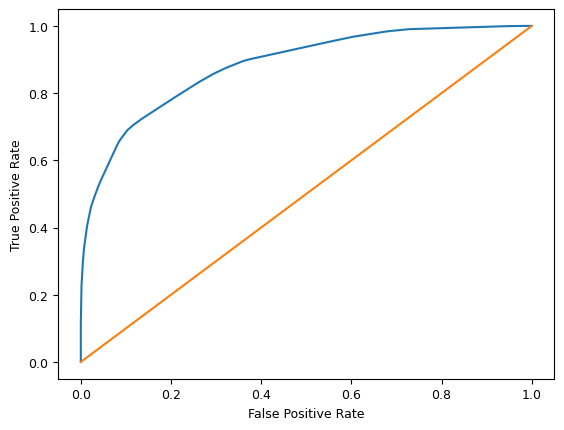


AU-ROC Score train: 0.7256377902053537


In [98]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_roc1 = roc_auc_score(y_train, y_pred_train)
print("\nAU-ROC Score train:", auc_roc1)

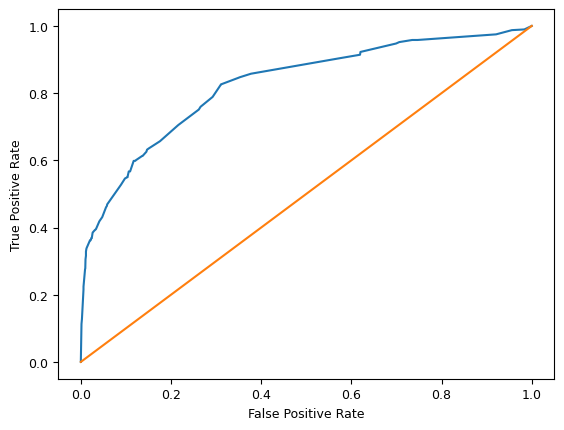


AU-ROC Score test: 0.6886807874882568


In [99]:
# Calculate AU-ROC score

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba )

plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_roc2 = roc_auc_score(y_test, y_pred)
print("\nAU-ROC Score test:", auc_roc2)

3. KNN Model:

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [112]:
feat_minmax = X1[['credit_score','age','tenure','balance','products_number','estimated_salary']]
mmscaler = MinMaxScaler()

X4 = pd.DataFrame (mmscaler.fit_transform(feat_minmax), columns = feat_minmax.columns)
X4

,credit_score,age,tenure,balance,products_number,estimated_salary
0,0.538,0.324324,0.2,0.000000,0.000000,0.506735
1,0.516,0.310811,0.1,0.334031,0.000000,0.562709
2,0.304,0.324324,0.8,0.636357,0.666667,0.569654
3,0.698,0.283784,0.1,0.000000,0.333333,0.469120
4,1.000,0.337838,0.2,0.500246,0.000000,0.395400
...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,0.481341
9996,0.332,0.229730,1.0,0.228657,0.000000,0.508490
9997,0.718,0.243243,0.7,0.000000,0.000000,0.210390
9998,0.844,0.324324,0.3,0.299226,0.333333,0.464429


In [113]:
X2 = pd.concat([X4, encoded_df], axis = 1)
X2.head()

,credit_score,age,tenure,balance,products_number,estimated_salary,country_Germany,country_Spain,gender_Male,credit_card_Yes,active_member_Yes
0,0.538,0.324324,0.2,0.000000,0.000000,0.506735,0.0,0.0,0.0,1.0,1.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.0,1.0,0.0,0.0,1.0
2,0.304,0.324324,0.8,0.636357,0.666667,0.569654,0.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0.0,0.0,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0.0,1.0,0.0,1.0,1.0


In [114]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y1, random_state = 10, test_size = 0.3)

In [120]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train1, y_train1)

KNeighborsClassifier()

In [121]:
y_pred = knn.predict(X_test1)
y_pred_train = knn.predict(X_train1)

In [122]:
accuracy_knn = accuracy_score(y_train1, y_pred_train)
precision_knn = precision_score(y_train1, y_pred_train)
recall_knn = recall_score(y_train1, y_pred_train)

print('For Train:')
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)

For Train:
Accuracy: 0.8638571428571429
Precision: 0.7815533980582524
Recall: 0.4544812985179958


In [123]:
accuracy_kn_tst = accuracy_score(y_test1, y_pred)
precision_kn_tst = precision_score(y_test1, y_pred)
recall_kn_tst = recall_score(y_test1, y_pred)

print('For Test:')
print("Accuracy:", accuracy_kn_tst)
print("Precision:", precision_kn_tst)
print("Recall:", recall_kn_tst)

For Test:
Accuracy: 0.8076666666666666
Precision: 0.5733788395904437
Recall: 0.2709677419354839


ROC Score

In [124]:
y_train_proba = best_model.predict_proba(X_train1)[:,1]
y_test_proba = best_model.predict_proba(X_test1)[:,1]

In [126]:
# Calculate AU-ROC score

fpr, tpr, thresholds = roc_curve(y_train1, y_train_proba )

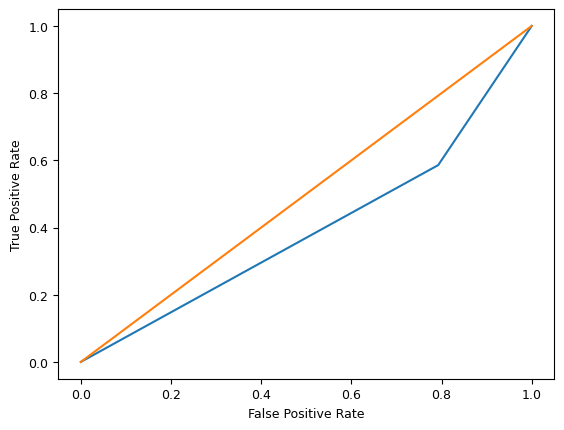


AU-ROC Score train: 0.711120283864049


In [128]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_roc3 = roc_auc_score(y_train1, y_pred_train)
print("\nAU-ROC Score train:", auc_roc3)

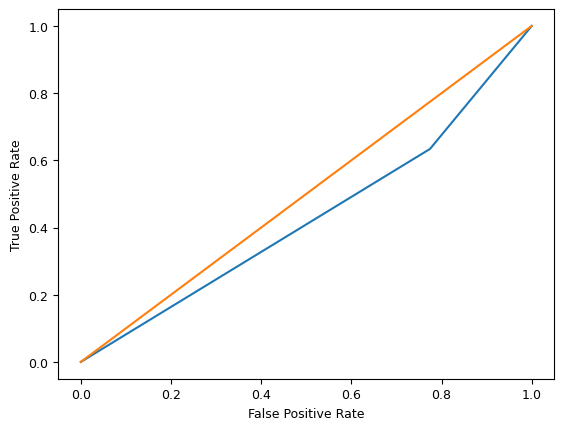


AU-ROC Score test: 0.6092233667660613


In [130]:
# Calculate AU-ROC score

fpr, tpr, thresholds = roc_curve(y_test1, y_test_proba )

plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_roc4 = roc_auc_score(y_test1, y_pred)
print("\nAU-ROC Score test:", auc_roc4)

Interpretation:
    
    As the graph of ROC Curve is downwards from the diagonal line separating the randomness of the model, we can infer that the KNN Model is not a good choice.

4. Random Forest Model:

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
random_forest = RandomForestClassifier(random_state=200)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

In [92]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)

Accuracy: 0.87
Precision: 0.7558528428093646
Recall: 0.47280334728033474


In [93]:
print("Random Forest Model")
print(classification_report(y_test, y_pred_rf))

Random Forest Model
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2022
           1       0.76      0.47      0.58       478

    accuracy                           0.87      2500
   macro avg       0.82      0.72      0.75      2500
weighted avg       0.86      0.87      0.86      2500



**REPORT:**
    
    From above we can see that Decision Tree is giving us the best results with AUROC score test.